判断寻找以得到最好的超参数lambda

In [1]:
import glob, os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class lam_com():
    '''
    density is in column 3
    accuracy is in column 6
    the last epoch is in row 199
    '''
    def __init__(self,alg):
        self.alg = alg
    def compare(self,model):
        filename = []
        lambda_ = []
        density = []
        accuracy = []
        fig, ax = plt.subplots()
        for file in glob.glob("results_{}/{}*.csv".format(self.alg,self.alg)):
            edition = file.split('_')[-3]
            if model in file:
                if edition == '1.0':
                    data = pd.read_csv(file)
                    lam = file.split('_')[-1][:-4]
                    lambda_.append(lam)
                    den = data.iloc[199,3]
                    density.append(den)
                    acc = data.iloc[199,6]
                    accuracy.append(acc)
        lambda_ = [float(lam) for lam in lambda_]
        # print(lambda_,density,accuracy)
        density = [x for _,x in sorted(zip(lambda_,density),reverse = True)]
        accuracy = [x for _,x in sorted(zip(lambda_,accuracy),reverse = True)]
        lambda_ = sorted(lambda_,reverse=True)
        ax.plot(lambda_,density,label = 'density')
        ax.plot(lambda_,accuracy,label = 'accuracy')
        ax.legend()
        plt.title('{}_{}'.format(self.alg,model))
        plt.show()
        
    def compare_(self,model,dataset):
        filename = []
        lambda_ = []
        density = []
        accuracy = []
        fig, ax = plt.subplots()
        for file in glob.glob("results_{}/{}_{}_{}*.csv".format(self.alg,self.alg,model,dataset)):
            edition = file.split('_')[-5]
            if model in file:
                if edition == '1.0':
                    data = pd.read_csv(file)
                    lam = file.split('_')[-1][:-4]
                    lambda_.append(lam)
                    den = data.iloc[199,3]
                    density.append(den)
                    acc = data.iloc[199,6]
                    accuracy.append(acc)
        lambda_ = [float(lam) for lam in lambda_]
        # print(lambda_,density,accuracy)
        density = [x for _,x in sorted(zip(lambda_,density),reverse = True)]
        accuracy = [x for _,x in sorted(zip(lambda_,accuracy),reverse = True)]
        lambda_ = sorted(lambda_,reverse=True)
        ax.plot(lambda_,density,label = 'density')
        ax.plot(lambda_,accuracy,label = 'accuracy')
        ax.legend()
        plt.title('{}_{}'.format(self.alg,model))
        plt.show()

    def compare_theta(self,model,dataset,theta):
        filename = []
        lambda_ = []
        density = []
        accuracy = []
        fig, ax = plt.subplots()
        for file in glob.glob("results_{}/{}_{}_{}*theta_{}*.csv".format(self.alg,self.alg,model,dataset,theta)):
            edition = file.split('_')[-5]
            if model in file:
                if edition == '1.0':
                    data = pd.read_csv(file)
                    lam = file.split('_')[-1][:-4]
                    lambda_.append(lam)
                    den = data.iloc[199,3]
                    density.append(den)
                    acc = data.iloc[199,6]
                    accuracy.append(acc)
        lambda_ = [float(lam) for lam in lambda_]
        # print(lambda_,density,accuracy)
        density = [x for _,x in sorted(zip(lambda_,density),reverse = True)]
        accuracy = [x for _,x in sorted(zip(lambda_,accuracy),reverse = True)]
        lambda_ = sorted(lambda_,reverse=True)
        ax.plot(lambda_,density,label = 'density')
        ax.plot(lambda_,accuracy,label = 'accuracy')
        ax.legend()
        plt.title('{}_{}'.format(self.alg,model))
        plt.show()
    

因此，大概可以看到1.1e-5的确是一个比较好的选择

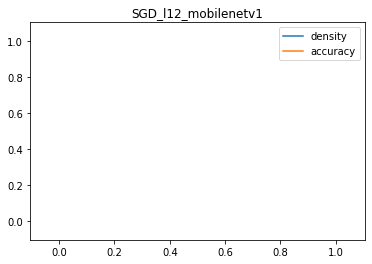

In [4]:
lam_com('SGD_l12').compare_('mobilenetv1','cifar10')

因此，大概可以看到1.5e-4的确是一个比较好的选择

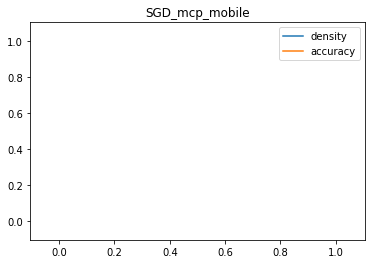

In [5]:
lam_com('SGD_mcp').compare('mobile')

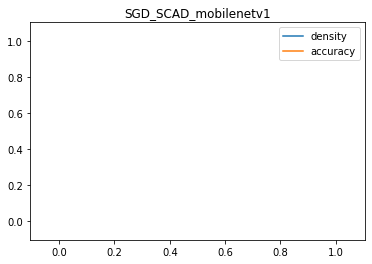

In [6]:
lam_com('SGD_SCAD').compare_theta('mobilenetv1','cifar10',2)

### 讨论不同模型，在相同lambda下不同epoch,(accuracy,density)的变化，也就是在训练过程中的变化

In [8]:
from utils import AverageMeter
import csv
import pylatex as pl
import pandas as pd

In [9]:
%matplotlib auto
import pandas as pd
import glob, os
import matplotlib.pyplot as plt
import numpy as np
os.chdir(".")
class draw():
    def __init__(self,alg,model,dataset,density_log,accuracy_log,lambd=0):
        filename = []
        for file in glob.glob("results_{}/*.csv".format(alg)):
            filename.append(file)
        fig, ax = plt.subplots()
        for file in filename:
            color = tuple(np.random.rand(4))
            lambda_ = file.split('_')[-1][:-4]
            if float(lambda_) == lambd:
                if model in file and dataset in file:
                    label = file.split('_')[0]+'_'+file.split('_')[1]+'lambda_'+ lambda_
                    data = pd.read_csv(file)
                    # self.den_acu(data,label)
                    epoch = data[:len(data)-1]['epoch']
                    density = data[:len(data)-1]['density']
                    accuracy = data[:len(data)-1]['accuracy']
                    density_log.update(density.iloc[len(density)-1,])
                    density_log.save(density.iloc[len(density)-1,])
                    accuracy_log.update(accuracy.iloc[len(accuracy)-1,])
                    accuracy_log.save(accuracy.iloc[len(accuracy)-1,])
                    ax.plot(epoch,density,label = label,color = color)
                    ax.plot(epoch,accuracy,label = label,color = color)

        ax.legend()
        plt.title('{}'.format(alg))
        plt.show()
        self.den = density_log
        self.den_std = np.std(density_log.store,ddof = 1)
        self.acc = accuracy_log
        self.acc_std = np.std(accuracy_log.store,ddof = 1)



Using matplotlib backend: agg


In [10]:
def data_process(alg,Model,Dataset,lambda_):
    density_log = AverageMeter('density_log')
    accuracy_log = AverageMeter('accuracy_log')
    log = draw(alg,Model,Dataset,density_log=density_log,accuracy_log=accuracy_log,lambd = lambda_)
    print(log.den.avg,log.acc.avg)
    writer.writerow({
        'Model':Model,
        'Algorithm':alg,
        'Datasets':Dataset,
        'density':log.den.avg,
        'accuracy':log.acc.avg,
        'density_std':log.den_std,
        'accuracy_std':log.acc_std
    })
    csvfile.flush()

### 最佳lambda_
- SGD_l1: 1e-4
- SGD_mcp: 1.1e-5
- SGD_l12: 1.5e-4
- SGD_l1: 1.5e-4
- SGD_SCAD: 
- SGD_l12_freeze_Np100:
- SGD_capped:
- SGD_l12_freeze_alternative

In [12]:
os.makedirs('csv',exist_ok=True)
fieldname = ['Model','Datasets','Algorithm','density','density_std','accuracy','accuracy_std']
csvname = os.path.join('csv/result.csv')
csvfile = open(csvname,'w',newline= '')
writer = csv.DictWriter(csvfile,fieldnames=fieldname,delimiter = ',')
writer.writeheader()
data_process('SGD_l1','mobile','chestX',0.0002)
data_process('SGD_l1','resnet18','chestX',0.0001)
data_process('SGD_l1','resnet50','chestX',0.0004)
data_process('SGD_mcp','mobile','chestX',0.0004)
# data_process('SGD_l1','mobile','fashion_mnist',0.0001)
# data_process('SGD_l1','resnet','cifar10',0.0001)
# data_process('SGD_l1','resnet','fashion_mnist',0.0001)
# data_process('SGD_mcp','mobile','cifar10',1.1e-5)
# data_process('SGD_mcp','mobile','fashion_mnist',1.1e-5)
# data_process('SGD_mcp','resnet','cifar10',1.1e-5)
# data_process('SGD_mcp','resnet','fashion_mnist',1.1e-5)
# data_process('SGD_l12','mobile','cifar10',1.5e-4)
# data_process('SGD_l1','mobile','cifar10',1.5e-4)

0.5329761065089942 0.7676282051282052
0.9351966103735296 0.7355769230769231
0.4226794153180913 0.7387820512820513
0.5062963338135542 0.7403846153846154


# 探究不同epoch下的density变化

In [42]:
class display():
    def __init__(self,algorithm,model,dataset,lambda_,epoch):
        self.alg = algorithm
        self.model = model
        self.dataset = dataset
        self.lambda_ = lambda_
        self.epoch = epoch
    def draw(self,den_or_acc = True):
        filename = []
        for file in glob.glob('results_{}/{}*.csv'.format(self.alg,self.alg)):
            if str('{:1.1e}'.format(self.lambda_)) in file:
                if self.model in file:
                    if self.dataset in file:
                        filename.append(file)
        fig, ax = plt.subplots()
        for file in filename:
            color = tuple(np.random.rand(4))
            edition = file.split('_')[-5]
            label1 = [self.alg,self.model, self.dataset,str('{:1.1e}'.format(self.lambda_)),edition]
            label = '_'.join(label1)
            data = pd.read_csv(file)
            epoch = data[:len(data)-1]['epoch']
            density = data[:len(data)-1]['density']
            accuracy = data[:len(data)-1]['accuracy']
            if den_or_acc:
                ax.plot(epoch,density,label = label, color = color)
            else:
                ax.plot(epoch,accuracy, label = label, color = color)
        ax.legend()
        plt.title('{}'.format(self.alg))
        plt.show()        
        
        


In [43]:
display('SGD_l12_freeze','mobilenetv1','cifar10',1.5e-04,200).draw()
display('SGD_l12_freeze','mobilenetv1','fashion_mnist',1.5e-04,200).draw()
display('SGD_l12_freeze','resnet18','cifar10',1.5e-04,200).draw()
display('SGD_l12_freeze','resnet18','fashion_mnist',1.5e-04,200).draw()

In [37]:
display('SGD_l12_freeze','mobilenetv1','cifar10',1.5e-04,200).draw(False)
display('SGD_l12_freeze','mobilenetv1','fashion_mnist',1.5e-04,200).draw(False)
display('SGD_l12_freeze','resnet18','cifar10',1.5e-04,200).draw(False)
display('SGD_l12_freeze','resnet18','fashion_mnist',1.5e-04,200).draw(False)

In [44]:
import pandas as pd

In [45]:
df = pd.read_csv('csv/result.csv')
df['result'] = df.apply(lambda x:'{:.2f}/{:.2f}'.format(x['density'],x['accuracy']),axis = 1)
df['density_conf'] = df.apply(lambda x:'[{:.4f},{:.4f}]'.format(x['density']-x['density_std']*1.96,x['density']+x['density_std']*1.96),axis = 1)
df['accuracy_conf'] = df.apply(lambda x:'[{:.4f},{:.4f}]'.format(x['accuracy']-x['accuracy_std']*1.96,x['accuracy']+x['accuracy_std']*1.96),axis = 1)
df
df['density'] = df.apply(lambda x: '{:.4f}'.format(x['density']),axis = 1)
df['density_std'] = df.apply(lambda x: '{:.4f}'.format(x['density_std']),axis = 1)
df['accuracy'] = df.apply(lambda x: '{:.4f}'.format(x['accuracy']),axis = 1)
df['accuracy_std'] = df.apply(lambda x: '{:.4f}'.format(x['accuracy_std']),axis =1)

In [46]:
df

,Model,Datasets,Algorithm,density,density_std,accuracy,accuracy_std,result,density_conf,accuracy_conf
0,mobile,cifar10,SGD_l1,0.3299,0.0066,0.9060,0.0021,0.33/0.91,"[0.3170,0.3427]","[0.9020,0.9101]"
1,mobile,fashion_mnist,SGD_l1,0.0995,0.0034,0.9434,0.0010,0.10/0.94,"[0.0930,0.1061]","[0.9415,0.9453]"
2,resnet,cifar10,SGD_l1,0.1430,0.0141,0.9234,0.0015,0.14/0.92,"[0.1153,0.1707]","[0.9204,0.9264]"
3,resnet,fashion_mnist,SGD_l1,0.0945,0.0198,0.9424,0.0018,0.09/0.94,"[0.0558,0.1333]","[0.9388,0.9459]"
4,mobile,cifar10,SGD_mcp,0.1810,0.0056,0.9053,0.0024,0.18/0.91,"[0.1700,0.1920]","[0.9005,0.9101]"
5,mobile,fashion_mnist,SGD_mcp,0.0583,0.0027,0.9429,0.0007,0.06/0.94,"[0.0530,0.0637]","[0.9415,0.9443]"
6,resnet,cifar10,SGD_mcp,0.1396,0.0101,0.9221,0.0019,0.14/0.92,"[0.1197,0.1594]","[0.9185,0.9257]"
7,resnet,fashion_mnist,SGD_mcp,0.0866,0.0108,0.9417,0.0017,0.09/0.94,"[0.0655,0.1077]","[0.9383,0.9452]"
8,mobile,cifar10,SGD_l12,0.0892,0.0036,0.9074,0.0031,0.09/0.91,"[0.0821,0.0964]","[0.9013,0.9135]"
9,mobile,cifar10,SGD_l1,0.4188,nan,0.8463,nan,0.42/0.85,"[nan,nan]","[nan,nan]"


In [40]:
df.pivot_table(index=['Model','Datasets'],columns=['Algorithm'],values=['result'], aggfunc='first')

result                      
Algorithm                SGD_l1    SGD_l12    SGD_mcp
Model  Datasets                                      
mobile cifar10        0.33/0.91  0.09/0.91  0.18/0.91
       fashion_mnist  0.10/0.94        NaN  0.06/0.94
resnet cifar10        0.14/0.92        NaN  0.14/0.92
       fashion_mnist  0.09/0.94        NaN  0.09/0.94

In [15]:
pos = '{}'.format(10*'c')
doc = pl.Document()
with doc.create(pl.Section('Table')):
    with doc.create(pl.Tabular(pos,width=10)) as table:
        table.add_hline()
        table.add_row(list(df.columns))
        table.add_hline()
        for row in df.index:
            table.add_row(list(df.loc[row,:]))
        table.add_hline()


doc.generate_pdf('full', clean_tex=False)